In [ ]:
import sys, os
sys.path.append('..'); os.chdir('..')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 
dataset_path = Path(r"C:\datasets\AffectiveComputing\Emodataset")
dataset_path.exists()

True

In [ ]:
df_train = pd.read_csv(str(dataset_path / "train_labels.csv"), index_col=0)
df_test =  pd.read_csv(str(dataset_path / "test_labels.csv"), index_col=0)
print(df_train.head())
df_test.describe()

                    pth     label   valence   arousal
27490  image0032989.jpg      fear -0.451799 -0.595669
25839  image0021114.jpg  surprise  0.546351 -0.019372
14360     ffhq_3890.png     happy  0.785033  0.458038
14315      ffhq_385.png     happy  0.730200 -0.347021
7185   image0038242.jpg  surprise  0.557352  0.928576


,valence,arousal
count,5393.000000,5393.000000
mean,-0.039577,-0.107539
std,0.658544,0.603393
min,-0.899664,-0.999811
25%,-0.609870,-0.677280
50%,-0.444245,-0.155341
75%,0.710497,0.409262
max,0.899641,0.998979


In [ ]:
# modify dataframes
df_train["arousal"] = df_train["arousal"] * 2 - 1
df_test["arousal"] =  df_test["arousal"] * 2 - 1

In [32]:
# save modified dataframes
df_train.to_csv(str(dataset_path / "train_labels_modified.csv"))
df_test.to_csv(str(dataset_path / "test_labels_modified.csv"))

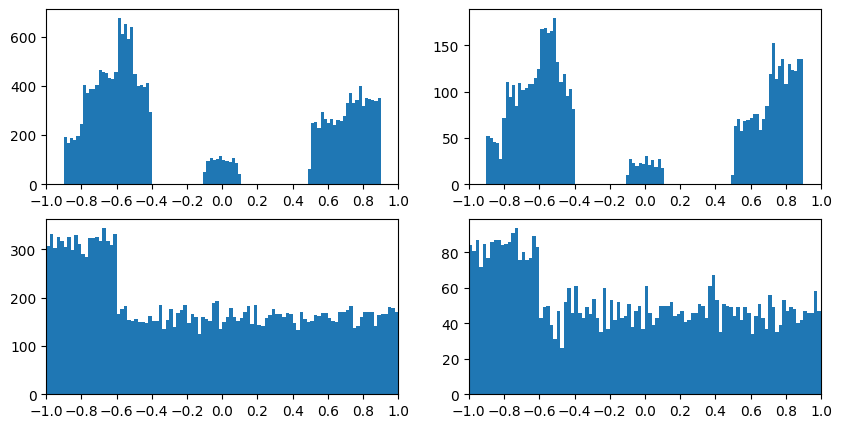

In [30]:
# plot valence and arousal histograms 
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,5))

bins = 100

ax[0,0].hist(df_train["valence"], bins=bins)
ax[0,1].hist(df_test["valence"], bins=bins)

ax[1,0].hist(df_train["arousal"], bins=bins)
ax[1,1].hist(df_test["arousal"], bins=bins)

for axis in ax.flatten():
    axis.set_xlim(-1,1)
    axis.set_xticks(np.arange(-1,1.2,0.2))

plt.show()

In [46]:
# extract label number
CANONICAL_8 = ["neutral","happy","sad","surprise","fear","disgust","anger","contempt"]
CANONICAL_8 = { label: idx for idx, label in enumerate(CANONICAL_8) }
df_train["label_idx"] = df_train["label"].apply(lambda x: CANONICAL_8[x])
df_test["label_idx"] = df_test["label"].apply(lambda x: CANONICAL_8[x])

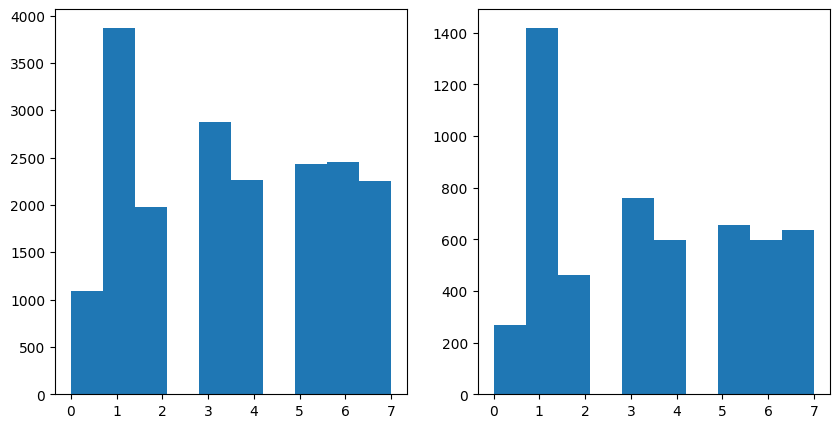

In [47]:
# analysing discrete emotion distribution

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].hist(df_train["label_idx"])
ax[1].hist(df_test["label_idx"])
plt.show()